In [89]:
import pandas as pd
import matplotlib.pyplot as plt

In [90]:
games = pd.read_csv("nflgames.csv")

In [91]:
# deleting all games before 1990 as well as all playoff games
games = games.loc[games["schedule_season"] >= 1990]
games = games.loc[(games["schedule_week"] != "Wildcard") & (games["schedule_week"] != "Division") & (games["schedule_week"] != "Conference") & (games["schedule_week"] != "Superbowl")]

In [92]:
teams = list(games.team_home.unique())

In [93]:
# renaming the old teams in order to have uniform team names
new_teams = {"San Diego Chargers": "Los Angeles Chargers", "Houston Oilers": "Tennessee Titans", "Tennessee Oilers": "Tennessee Titans", "St. Louis Rams": "Los Angeles Rams", "Los Angeles Raiders": "Oakland Raiders", "Phoenix Cardinals": "Arizona Cardinals"}
for old_team in new_teams.keys():
    games.loc[games["team_home"] == old_team, "team_home"] = new_teams[old_team]
    games.loc[games["team_away"] == old_team, "team_away"] = new_teams[old_team]
    teams.remove(old_team)

In [94]:
# setting up a new column for the winner of the game
games["winner"] = ""
games.loc[games.score_home > games.score_away, "winner"] = games.team_home
games.loc[games.score_home < games.score_away, "winner"] = games.team_away
games.loc[games.score_home == games.score_away, "winner"] = "draw"

In [95]:
# calculating the records for home and away team for each game (records include game) 
games["home wins"] = 0
games["home losses"] = 0
games["away wins"] = 0
games["away losses"] = 0
for team in teams:
    for season in range(1990, 2020):
        wins = 0
        losses = 0
        for week in range(1,18):
            if not games.loc[(games["schedule_season"] == season) & (games["schedule_week"] == str(week)) & (games["winner"] == team)].empty:
                wins += 1
            elif not games.loc[(games["schedule_season"] == season) & (games["schedule_week"] == str(week)) & (games["winner"] != team) & ((games["team_home"] == team) | (games["team_away"] == team))].empty:
                losses += 1
            if not games.loc[(games["schedule_season"] == season) & (games["schedule_week"] == str(week)) & (games["team_home"] == team)].empty:
                games.loc[(games["schedule_season"] == season) & (games["schedule_week"] == str(week)) & (games["team_home"] == team), "home wins"] = wins
                games.loc[(games["schedule_season"] == season) & (games["schedule_week"] == str(week)) & (games["team_home"] == team), "home losses"] = losses
            elif not games.loc[(games["schedule_season"] == season) & (games["schedule_week"] == str(week)) & (games["team_away"] == team)].empty:
                games.loc[(games["schedule_season"] == season) & (games["schedule_week"] == str(week)) & (games["team_away"] == team), "away wins"] = wins
                games.loc[(games["schedule_season"] == season) & (games["schedule_week"] == str(week)) & (games["team_away"] == team), "away losses"] = losses
                

In [96]:
after_BYE = dict.fromkeys(teams, [])

In [97]:
# creating a dictionary with the year, week and record for every time a team has played after a bye week. 
record = ""
for team in teams:
    after_BYE[team] = []
    for year in range(1990, 2020):
        for week in range(1,17):
            if games.loc[(games["schedule_week"] == str(week)) & (games["schedule_season"] == year) & ((games["team_home"] == team) | (games["team_away"] == team))].empty:
                if not games.loc[(games["schedule_week"] == str(week-1)) & (games["schedule_season"] == year) & (games["team_home"] == team)].empty:
                    if not games.loc[(games["schedule_week"] == str(week-1)) & (games["schedule_season"] == year) & (games["team_home"] == team) & (games["home wins"] > games["home losses"])].empty:
                        record = "winning"
                    else: 
                        record = "losing"
                elif not games.loc[(games["schedule_week"] == str(week-1)) & (games["schedule_season"] == year) & (games["team_away"] == team)].empty:
                    if not games.loc[(games["schedule_week"] == str(week-1)) & (games["schedule_season"] == year) & (games["team_away"] == team) & (games["away wins"] > games["away losses"])].empty:
                        record = "winning"
                    else: 
                        record = "losing"
                
                after_BYE[team].append((year, week + 1, record))


In [98]:
after_BYE["Los Angeles Chargers"]

[(1990, 15, 'losing'),
 (1991, 11, 'losing'),
 (1992, 7, 'losing'),
 (1993, 5, 'winning'),
 (1993, 9, 'losing'),
 (1994, 6, 'winning'),
 (1995, 10, 'losing'),
 (1996, 8, 'winning'),
 (1997, 8, 'losing'),
 (1998, 10, 'losing'),
 (1999, 2, 'losing'),
 (2000, 9, 'losing'),
 (2002, 9, 'winning'),
 (2003, 7, 'losing'),
 (2004, 11, 'winning'),
 (2005, 11, 'winning'),
 (2006, 4, 'winning'),
 (2007, 8, 'losing'),
 (2008, 10, 'losing'),
 (2009, 6, 'losing'),
 (2010, 11, 'losing'),
 (2011, 7, 'winning'),
 (2012, 8, 'losing'),
 (2013, 9, 'winning'),
 (2014, 11, 'winning'),
 (2015, 11, 'losing'),
 (2016, 12, 'losing'),
 (2017, 10, 'losing'),
 (2018, 9, 'winning'),
 (2019, 13, 'losing')]

In [99]:
games.loc[(games["team_home"] == "Los Angeles Chargers") & (games["schedule_season"] == 1991)]

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,...,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,winner,home wins,home losses,away wins,away losses
5190,09/15/1991,1991,3,False,Los Angeles Chargers,10,13,Atlanta Falcons,LAC,-2.0,...,False,67.0,9.0,74,NaN,Atlanta Falcons,0,3,1,2
5216,09/29/1991,1991,5,False,Los Angeles Chargers,13,14,Kansas City Chiefs,KC,-3.5,...,False,68.0,9.0,81,NaN,Kansas City Chiefs,0,5,3,2
5251,10/20/1991,1991,8,False,Los Angeles Chargers,24,30,Cleveland Browns,LAC,-5.0,...,False,62.0,9.0,90,NaN,Cleveland Browns,1,7,3,4
5288,11/10/1991,1991,11,False,Los Angeles Chargers,17,14,Seattle Seahawks,SEA,-2.0,...,False,63.0,8.0,71,NaN,Los Angeles Chargers,2,8,5,5
5303,11/17/1991,1991,12,False,Los Angeles Chargers,24,21,New Orleans Saints,NO,-4.5,...,False,58.0,9.0,69,NaN,Los Angeles Chargers,3,8,9,2
5329,12/01/1991,1991,14,False,Los Angeles Chargers,7,9,Oakland Raiders,OAK,-5.5,...,False,53.0,10.0,25,NaN,Oakland Raiders,3,10,9,4
5358,12/15/1991,1991,16,False,Los Angeles Chargers,38,30,Miami Dolphins,MIA,-1.0,...,False,60.0,8.0,47,NaN,Los Angeles Chargers,4,11,8,7
5371,12/22/1991,1991,17,False,Los Angeles Chargers,14,17,Denver Broncos,DEN,-3.0,...,False,57.0,6.0,55,NaN,Denver Broncos,4,12,12,4


deleting the years where teams were inactive from the after_BYE dictionary:

In [100]:
after_BYE["Houston Texans"] = after_BYE["Houston Texans"][-18:]

In [101]:
after_BYE["Cleveland Browns"] = after_BYE["Cleveland Browns"][:7] + after_BYE["Cleveland Browns"][-19:]

In [102]:
after_BYE["Jacksonville Jaguars"] = after_BYE["Jacksonville Jaguars"][-25:]

In [103]:
after_BYE["Carolina Panthers"] = after_BYE["Carolina Panthers"][-25:]

In [104]:
after_BYE["Baltimore Ravens"] = after_BYE["Baltimore Ravens"][-24:]

In [105]:
after_BYE["Minnesota Vikings"] = after_BYE["Minnesota Vikings"][1:]

In [106]:
after_BYE["Cincinnati Bengals"] = after_BYE["Cincinnati Bengals"][1:]

In [107]:
after_BYE["Detroit Lions"] = after_BYE["Detroit Lions"][1:]

In [108]:
# calculating the absolute wins and winning percentage after a bye week for every team
games["after BYE"] = 0
win_after_BYE = {}
wins_after_BYE = {}
total_after_BYE = 0
for team in after_BYE.keys():
    games["after BYE"] = 0
    for game in after_BYE[team]:
        total_after_BYE += 1
        games.loc[(games["schedule_season"] == int(game[0])) & (games["schedule_week"] == str(game[1])) & ((games["team_home"] == team) | (games["team_away"] == team)), "after BYE"] = 1
    wins_after_BYE[team] = len(games.loc[(games["after BYE"] == 1) & (games["winner"] == team)])
    win_after_BYE[team] = len(games.loc[(games["after BYE"] == 1) & (games["winner"] == team)])/len(games.loc[games["after BYE"] == 1])

In [109]:
win_after_BYE

{'Atlanta Falcons': 0.6129032258064516,
 'Buffalo Bills': 0.6451612903225806,
 'Chicago Bears': 0.5483870967741935,
 'Cincinnati Bengals': 0.25806451612903225,
 'Cleveland Browns': 0.34615384615384615,
 'Dallas Cowboys': 0.6774193548387096,
 'Detroit Lions': 0.5161290322580645,
 'Green Bay Packers': 0.5806451612903226,
 'Kansas City Chiefs': 0.5806451612903226,
 'New England Patriots': 0.6129032258064516,
 'New York Giants': 0.3870967741935484,
 'Washington Redskins': 0.45161290322580644,
 'New Orleans Saints': 0.5161290322580645,
 'Indianapolis Colts': 0.6129032258064516,
 'Miami Dolphins': 0.5483870967741935,
 'Minnesota Vikings': 0.6129032258064516,
 'New York Jets': 0.41935483870967744,
 'Philadelphia Eagles': 0.7096774193548387,
 'Pittsburgh Steelers': 0.6129032258064516,
 'San Francisco 49ers': 0.3548387096774194,
 'Seattle Seahawks': 0.3870967741935484,
 'Tampa Bay Buccaneers': 0.41935483870967744,
 'Denver Broncos': 0.7096774193548387,
 'Los Angeles Rams': 0.4838709677419355,
 

In [110]:
# calculating the general winning percentage for every team
win_general = {}
for team in after_BYE.keys():
    win_general[team] = len(games.loc[games["winner"] == team])/len(games.loc[(games["team_home"] == team) | (games["team_away"] == team)])

In [111]:
win_general

{'Atlanta Falcons': 0.49064449064449067,
 'Buffalo Bills': 0.5,
 'Chicago Bears': 0.4791666666666667,
 'Cincinnati Bengals': 0.41041666666666665,
 'Cleveland Browns': 0.32407407407407407,
 'Dallas Cowboys': 0.5604166666666667,
 'Detroit Lions': 0.40124740124740127,
 'Green Bay Packers': 0.604989604989605,
 'Kansas City Chiefs': 0.5583333333333333,
 'New England Patriots': 0.6361746361746362,
 'New York Giants': 0.501039501039501,
 'Washington Redskins': 0.4395833333333333,
 'New Orleans Saints': 0.5291666666666667,
 'Indianapolis Colts': 0.5479166666666667,
 'Miami Dolphins': 0.5072765072765073,
 'Minnesota Vikings': 0.5416666666666666,
 'New York Jets': 0.44375,
 'Philadelphia Eagles': 0.5625,
 'Pittsburgh Steelers': 0.6216216216216216,
 'San Francisco 49ers': 0.54375,
 'Seattle Seahawks': 0.525987525987526,
 'Tampa Bay Buccaneers': 0.4270833333333333,
 'Denver Broncos': 0.575,
 'Los Angeles Rams': 0.42083333333333334,
 'Arizona Cardinals': 0.40625,
 'Jacksonville Jaguars': 0.44,
 'Oa

In [112]:
# calculating the difference in winning percentage after a bye week and winning percentage in general for every team
difference = {}
for team in after_BYE.keys():
    difference[team] = win_after_BYE[team] - win_general[team]

In [113]:
difference

{'Atlanta Falcons': 0.12225873516196095,
 'Buffalo Bills': 0.14516129032258063,
 'Chicago Bears': 0.06922043010752682,
 'Cincinnati Bengals': -0.1523521505376344,
 'Cleveland Browns': 0.022079772079772075,
 'Dallas Cowboys': 0.11700268817204296,
 'Detroit Lions': 0.11488163101066323,
 'Green Bay Packers': -0.024344443699282348,
 'Kansas City Chiefs': 0.022311827956989272,
 'New England Patriots': -0.023271410368184586,
 'New York Giants': -0.11394272684595264,
 'Washington Redskins': 0.012029569892473113,
 'New Orleans Saints': -0.013037634408602172,
 'Indianapolis Colts': 0.0649865591397849,
 'Miami Dolphins': 0.0411105894976862,
 'Minnesota Vikings': 0.071236559139785,
 'New York Jets': -0.024395161290322542,
 'Philadelphia Eagles': 0.14717741935483875,
 'Pittsburgh Steelers': -0.008718395815169977,
 'San Francisco 49ers': -0.18891129032258058,
 'Seattle Seahawks': -0.13889075179397758,
 'Tampa Bay Buccaneers': -0.007728494623655879,
 'Denver Broncos': 0.1346774193548388,
 'Los Angel

In [114]:
team_colours = {"Atlanta Falcons": "crimson", "Buffalo Bills": "blue", "Chicago Bears": "orange", "Cincinnati Bengals": "orangered", "Cleveland Browns": "maroon", "Dallas Cowboys": "blue", "Detroit Lions": "dodgerblue", "Green Bay Packers": "darkgreen", "Kansas City Chiefs": "red", "New England Patriots": "navy", "New York Giants": "blue", "Washington Redskins": "firebrick", "New Orleans Saints": "black", "Indianapolis Colts": "royalblue", "Miami Dolphins": "turquoise", "Minnesota Vikings": "darkslateblue", "New York Jets": "darkgreen", "Philadelphia Eagles": "teal", "Pittsburgh Steelers": "yellow", "San Francisco 49ers": "red", "Seattle Seahawks": "midnightblue", "Tampa Bay Buccaneers": "crimson", "Denver Broncos": "orangered", "Los Angeles Rams": "blue", "Arizona Cardinals": "crimson", "Jacksonville Jaguars": "lightseagreen", "Oakland Raiders": "black", "Carolina Panthers": "dodgerblue", "Baltimore Ravens": "darkblue", "Tennessee Titans": "dodgerblue", "Houston Texans": "midnightblue", "Los Angeles Chargers": "dodgerblue"}

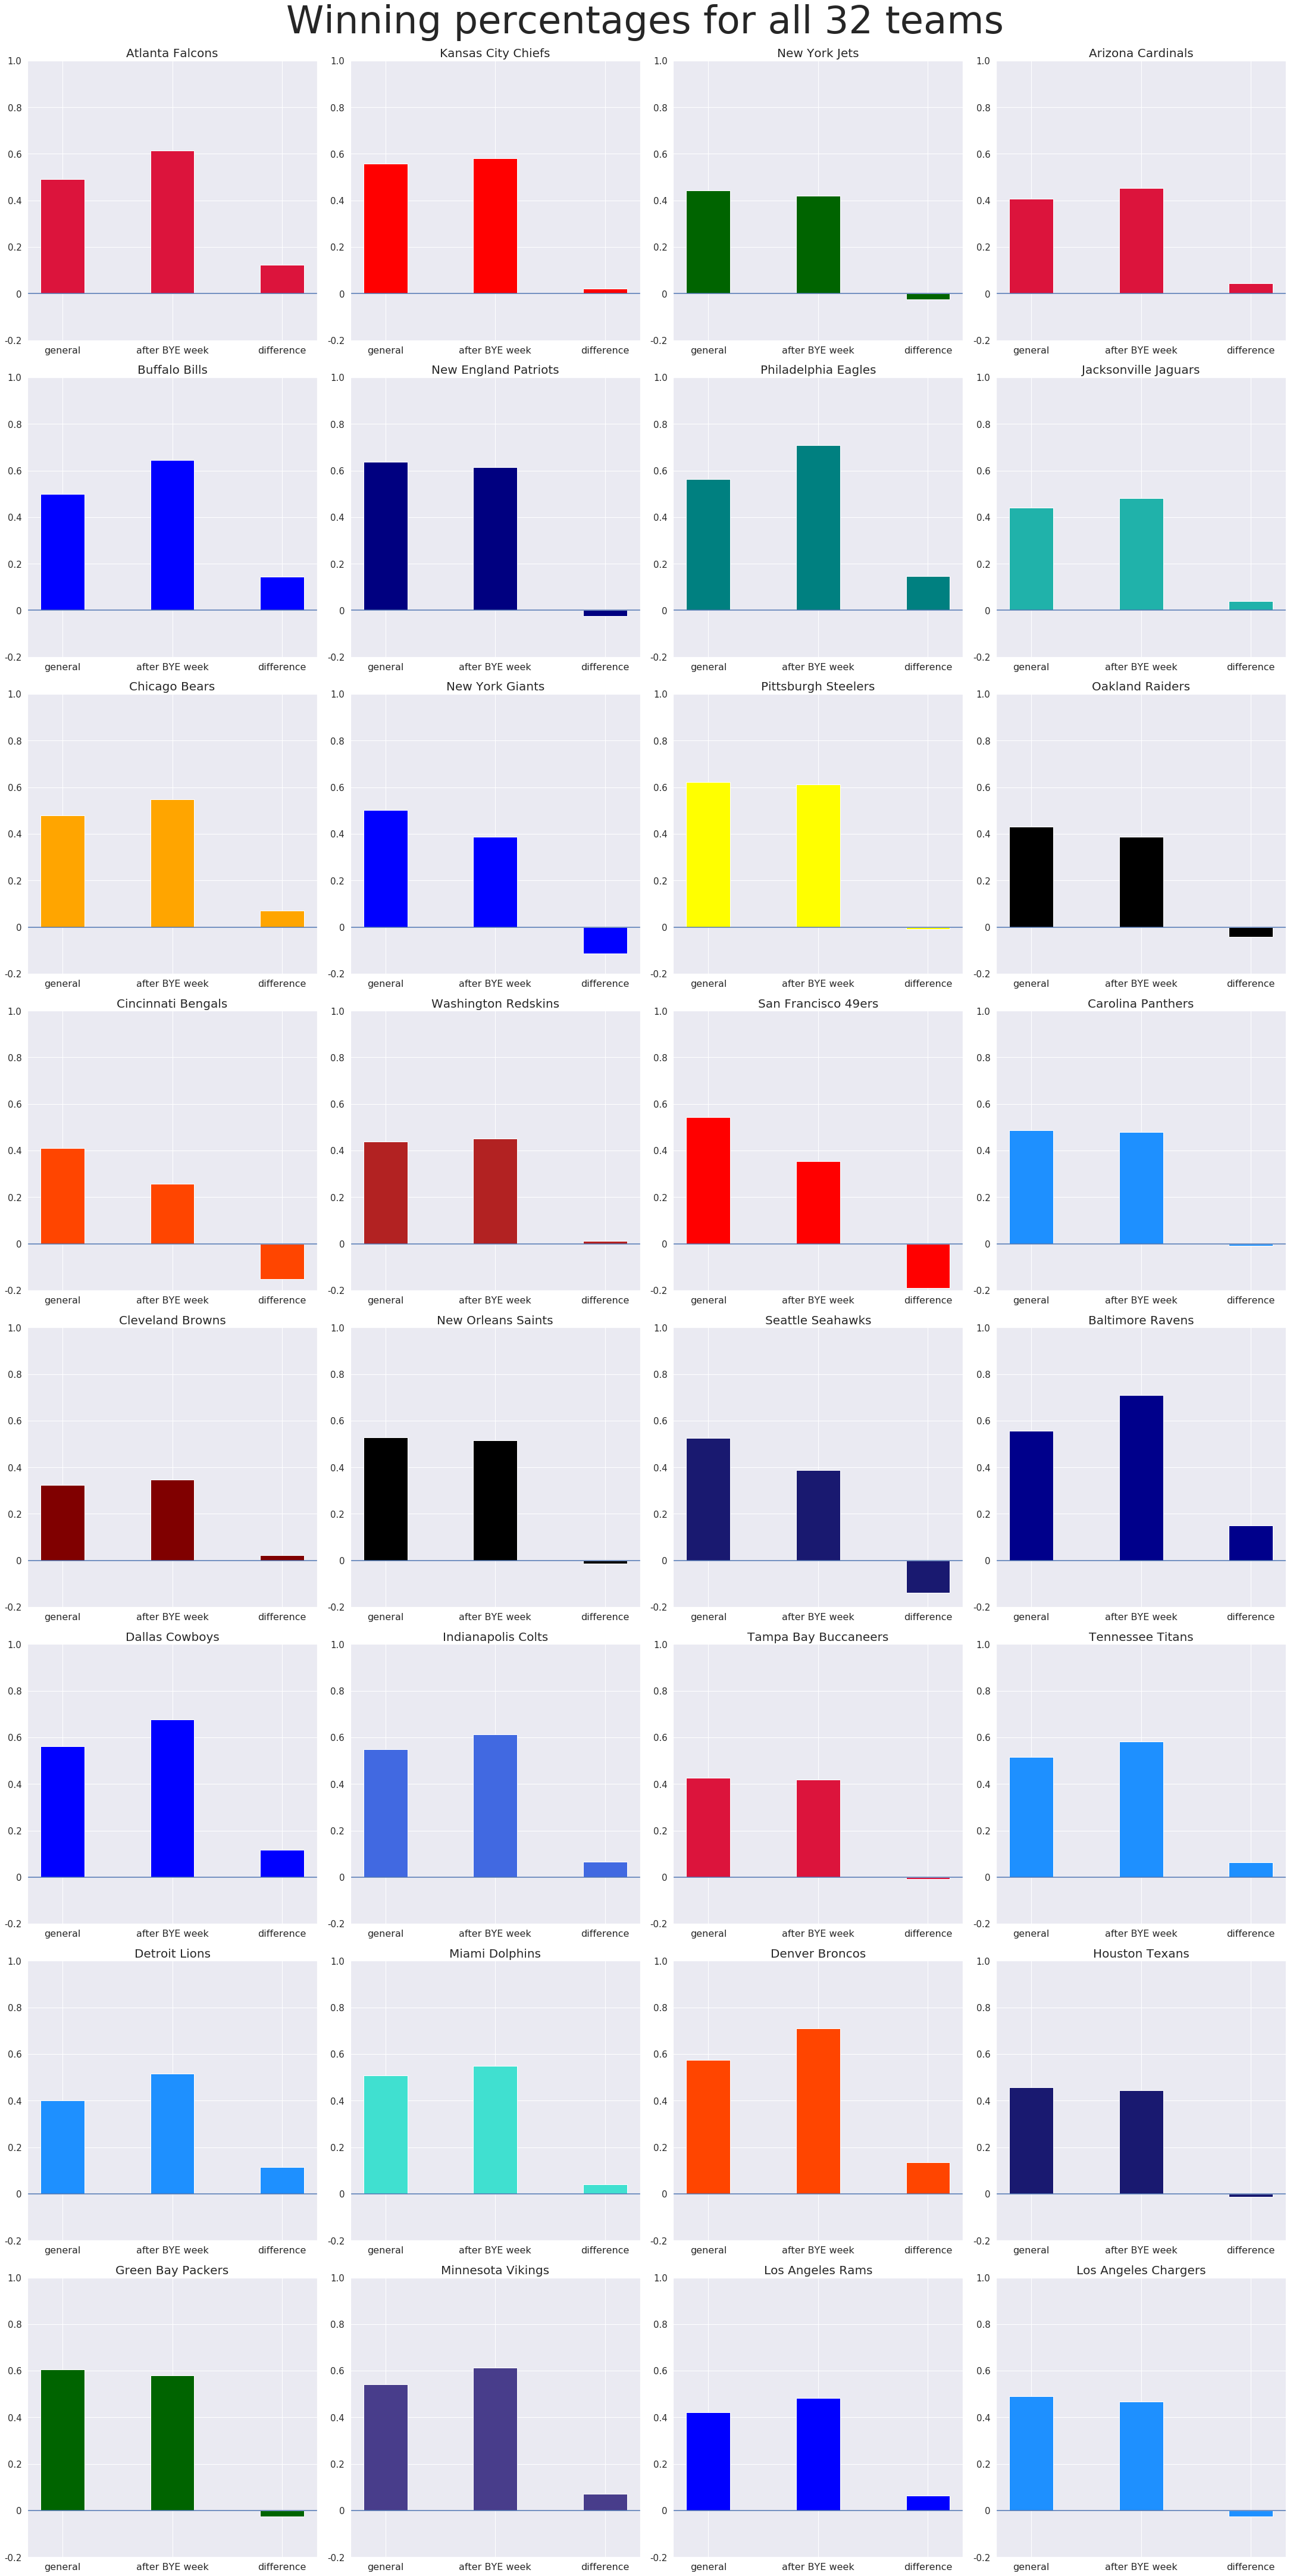

In [228]:
fig, axs = plt.subplots(nrows=8,ncols=4, figsize=(30,60), constrained_layout=True)
fig.suptitle('Winning percentages for all 32 teams', fontsize=64)
c = 0
r = 0

for i, t in enumerate(win_after_BYE.keys()):
    
    axs[r, c].bar(["general", "after BYE week", "difference"], [win_general[t], win_after_BYE[t], difference[t]], width = 0.4, color=team_colours[t])
    axs[r, c].set_title(t, size=20)
    axs[r, c].set_xticklabels(["general", "after BYE week", "difference"], fontsize=16)
    axs[r, c].set_yticklabels([-0.2,0,0.2,0.4,0.6,0.8,1.0], fontsize=15)
    axs[r, c].set(ylim=(-0.2,1))
    axs[r, c].axhline(y=0)
    axs[r, c].grid(color='gray', linestyle='dashed', axis="y", which="minor")
    
    #axs[r, c].set_yticklabels(labels=[None, 0, None, 0.2, None, 0.4, None, 0.6])
    r+=1
    if r == 8:
        r = 0
        c += 1

In [116]:
total_after_BYE

954

In [117]:
wins_after_BYE

{'Atlanta Falcons': 19,
 'Buffalo Bills': 20,
 'Chicago Bears': 17,
 'Cincinnati Bengals': 8,
 'Cleveland Browns': 9,
 'Dallas Cowboys': 21,
 'Detroit Lions': 16,
 'Green Bay Packers': 18,
 'Kansas City Chiefs': 18,
 'New England Patriots': 19,
 'New York Giants': 12,
 'Washington Redskins': 14,
 'New Orleans Saints': 16,
 'Indianapolis Colts': 19,
 'Miami Dolphins': 17,
 'Minnesota Vikings': 19,
 'New York Jets': 13,
 'Philadelphia Eagles': 22,
 'Pittsburgh Steelers': 19,
 'San Francisco 49ers': 11,
 'Seattle Seahawks': 12,
 'Tampa Bay Buccaneers': 13,
 'Denver Broncos': 22,
 'Los Angeles Rams': 15,
 'Arizona Cardinals': 14,
 'Jacksonville Jaguars': 12,
 'Oakland Raiders': 12,
 'Carolina Panthers': 12,
 'Baltimore Ravens': 17,
 'Tennessee Titans': 18,
 'Houston Texans': 8,
 'Los Angeles Chargers': 14}

In [118]:
total_wins_after_BYE = sum(wins_after_BYE.values())

In [119]:
total_wins_after_BYE

496

In [120]:
# calculating the winning percentage after a bye week for all teams
total_wins_after_BYE = sum(wins_after_BYE.values())
overall_win_after_BYE = total_wins_after_BYE/total_after_BYE
overall_win_after_BYE

0.519916142557652

In [121]:
# calculating the winning percentage for all teams
overall_win = (len(games.loc[games["winner"] != "draw"])/len(games))/2
overall_win

0.4991932230738201

In [182]:
import numpy as np

[Text(0, 0, '0'),
 Text(0, 0, ''),
 Text(0, 0, '0.2'),
 Text(0, 0, ''),
 Text(0, 0, '0.4'),
 Text(0, 0, ''),
 Text(0, 0, '0.6'),
 Text(0, 0, ''),
 Text(0, 0, '0.8'),
 Text(0, 0, ''),
 Text(0, 0, '1.0')]

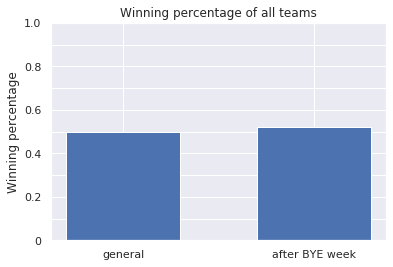

In [198]:
fig, ax = plt.subplots(nrows=1, ncols=1)

ax.bar(["general", "after BYE week"], [overall_win, overall_win_after_BYE], width=0.6)
ax.set(ylim=(0,1), ylabel="Winning percentage")
ax.set_title("Winning percentage of all teams")
ax.grid(color='gray', linestyle='dashed', axis="y", which="minor")
plt.yticks(np.arange(0, 1.1, step=0.1))
ax.set_yticklabels(labels=[0, None, 0.2, None, 0.4, None, 0.6, None, 0.8, None, 1.0])

In [123]:
# calculating the games and wins after a bye week for teams with a winning or losing (including neutral) record
after_BYE_games_winning = 0
after_BYE_games_losing = 0
after_BYE_wins_winning = 0
after_BYE_wins_losing = 0

for team in teams:
    for game in after_BYE[team]:
        if game[2] == "winning":
            after_BYE_games_winning += 1
            if not games.loc[(games["schedule_season"] == game[0]) & (games["schedule_week"] == str(game[1])) & (games["winner"] == team)].empty:
                after_BYE_wins_winning += 1
        else:
            after_BYE_games_losing += 1
            if not games.loc[(games["schedule_season"] == game[0]) & (games["schedule_week"] == str(game[1])) & (games["winner"] == team)].empty:
                after_BYE_wins_losing += 1
print("Games of teams with a winning record after a BYE week: " + str(after_BYE_games_winning))
print("Wins of teams with a winning record after a BYE week: " + str(after_BYE_wins_winning))
print("Games of teams with a losing or neutral record after a BYE week: " + str(after_BYE_games_losing))
print("Wins of teams with a losing or neutral record after a BYE week: " + str(after_BYE_wins_losing))
            

Games of teams with a winning record after a BYE week: 415
Wins of teams with a winning record after a BYE week: 251
Games of teams with a losing or neutral record after a BYE week: 539
Wins of teams with a losing or neutral record after a BYE week: 245


In [124]:
# calculating the games and wins for teams with a winning or losing (including neutral) record
gen_games_winning = 0
gen_games_losing = 0
gen_wins_winning = 0
gen_wins_losing = 0


for team in teams:
    for i, game in games.loc[(games["team_home"] == team) | (games["team_away"] == team)].iterrows():
        if game["team_home"] == team:
            if ((game["winner"] == team) and (game["home wins"] - 1 > game["home losses"])) or ((game["winner"] != team) and (game["home wins"] > game["home losses"] - 1)):
                gen_games_winning += 1
                if game["winner"] == team:
                    gen_wins_winning += 1
            else:
                gen_games_losing += 1
                if game["winner"] == team:
                    gen_wins_losing += 1
        else:
            if (game["winner"] == team and game["away wins"] - 1 > game["away losses"]) or (game["winner"] != team and game["away wins"] + 1> game["away losses"] - 1):
                gen_games_winning += 1
                if game["winner"] == team:
                    gen_wins_winning += 1
            else:
                gen_games_losing += 1
                if game["winner"] == team:
                    gen_wins_losing += 1

print("Games of teams with a winning record: " + str(gen_games_winning))
print("Wins of teams with a winning record: " + str(gen_wins_winning))
print("Games of teams with a losing or neutral record: " + str(gen_games_losing))
print("Wins of teams with a losing or neutral record: " + str(gen_wins_losing))
        

Games of teams with a winning record: 6912
Wins of teams with a winning record: 3639
Games of teams with a losing or neutral record: 7962
Wins of teams with a losing or neutral record: 3786


In [129]:
winning_perc_winning = gen_wins_winning/gen_games_winning
winning_perc_winning_after_BYE = after_BYE_wins_winning/after_BYE_games_winning
winning_perc_losing = gen_wins_losing/gen_games_losing
winning_perc_losing_after_BYE = after_BYE_wins_losing/after_BYE_games_losing

In [134]:
print("Win Percentage for teams with a winning record: " + str(winning_perc_winning))

Win Percentage for teams with a winning record: 0.5264756944444444


In [131]:
print("Win Percentage for teams with a winning record after a BYE week: " + str(winning_perc_winning_after_BYE))

Win Percentage for teams with a winning record after a BYE week: 0.6048192771084338


In [132]:
print("Win Percentage for teams with a losing or neutral record: " + str(winning_perc_losing))

Win Percentage for teams with a losing or neutral record: 0.47550866616428034


In [133]:
print("Win Percentage for teams with a losing or neutral record after a BYE week: " + str(winning_perc_losing_after_BYE))

Win Percentage for teams with a losing or neutral record after a BYE week: 0.45454545454545453


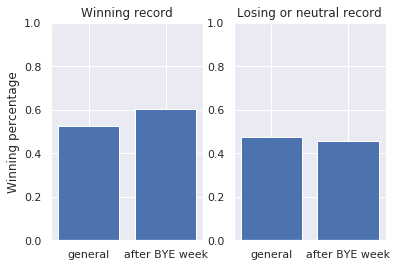

In [189]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

ax1.bar(["general", "after BYE week"], [winning_perc_winning, winning_perc_winning_after_BYE], width=0.8)
ax2.bar(["general", "after BYE week"], [winning_perc_losing, winning_perc_losing_after_BYE], width=0.8)
ax1.set_title("Winning record")
ax2.set_title("Losing or neutral record")
ax1.set(ylim=(0,1), ylabel="Winning percentage")
ax2.set(ylim=(0,1))
ax1.grid(color='gray', linestyle='dashed', axis="y", which="minor")
ax2.grid(color='gray', linestyle='dashed', axis="y", which="minor")